In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error,make_scorer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

df=pd.read_csv('/content/products_campaign_sales.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   limit_infor      731 non-null    int64  
 1   campaign_type    731 non-null    int64  
 2   campaign_level   731 non-null    int64  
 3   product_level    731 non-null    int64  
 4   resource_amount  731 non-null    int64  
 5   email_rate       731 non-null    float64
 6   price            729 non-null    float64
 7   discount_rate    731 non-null    float64
 8   hour_resouces    731 non-null    int64  
 9   campaign_fee     731 non-null    int64  
 10  orders           731 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 62.9 KB


# DATA OVERVIEW


In [2]:
df.head()

,limit_infor,campaign_type,campaign_level,product_level,resource_amount,email_rate,price,discount_rate,hour_resouces,campaign_fee,orders
0,0,6,0,1,1,0.08,140.0,0.83,93,888,1981
1,0,0,0,1,1,0.10,144.0,0.75,150,836,986
2,0,1,1,1,1,0.12,149.0,0.84,86,1330,1416
3,0,3,1,2,1,0.12,141.0,0.82,95,2273,2368
4,0,0,0,1,1,0.10,146.0,0.59,73,1456,1529


In [3]:
df.isnull().sum()


,0
limit_infor,0
campaign_type,0
campaign_level,0
product_level,0
resource_amount,0
email_rate,0
price,2
discount_rate,0
hour_resouces,0
campaign_fee,0


In [4]:
df.describe()


,limit_infor,campaign_type,campaign_level,product_level,resource_amount,email_rate,price,discount_rate,hour_resouces,campaign_fee,orders
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,729.000000,731.000000,731.000000,731.000000,731.000000
mean,0.042408,2.997264,0.683995,1.395349,4.952120,0.474337,162.812071,0.809617,848.176471,3696.391245,4531.079343
std,0.404911,2.004787,0.465233,0.544894,1.838449,0.162913,14.267136,0.077679,686.622488,1908.643139,1932.532346
min,0.000000,0.000000,0.000000,1.000000,1.000000,0.080000,100.000000,0.490000,2.000000,20.000000,22.000000
25%,0.000000,1.000000,0.000000,1.000000,3.000000,0.340000,152.000000,0.770000,315.500000,2497.000000,3199.000000
50%,0.000000,3.000000,1.000000,1.000000,5.000000,0.490000,163.000000,0.820000,713.000000,3662.000000,4563.000000
75%,0.000000,5.000000,1.000000,2.000000,7.000000,0.610000,173.000000,0.870000,1096.000000,4795.500000,6011.500000
max,10.000000,6.000000,1.000000,3.000000,9.000000,0.840000,197.000000,0.980000,3410.000000,33380.000000,8714.000000


In [5]:
df['campaign_level'].value_counts()

,count
campaign_level,
1,500
0,231


In [ ]:
df['campaign_type'].value_counts()

,count
campaign_type,
6,105
0,105
1,105
3,104
4,104
2,104
5,104


In [ ]:
df['product_level'].value_counts()

,count
product_level,
1,463
2,247
3,21


In [ ]:
df['email_rate'].value_counts().to_frame()

,count
email_rate,
0.65,25
0.32,23
0.54,20
0.64,20
0.53,20
...,...
0.14,1
0.13,1
0.17,1


In [ ]:
df['price'].value_counts()

,count
price,
154.0,25
149.0,24
169.0,24
165.0,23
159.0,23
...,...
133.0,1
196.0,1
125.0,1


In [ ]:
df['price'].fillna(df['price'].median(),inplace=True)

/tmp/ipython-input-50049080.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['price'].fillna(df['price'].median(),inplace=True)


In [ ]:
df.tail()


,limit_infor,campaign_type,campaign_level,product_level,resource_amount,email_rate,price,discount_rate,hour_resouces,campaign_fee,orders
726,0,5,1,1,8,0.79,149.0,0.83,829,4634,5463
727,0,5,1,1,8,0.79,154.0,0.83,670,3176,3846
728,0,5,1,1,8,0.84,158.0,0.87,562,2825,3387
729,0,6,0,1,8,0.80,150.0,0.87,987,2298,3285
730,0,6,0,1,9,0.80,149.0,0.84,1448,3392,4840


In [ ]:
df.groupby('campaign_type')['email_rate'].mean()

,email_rate
campaign_type,
0,0.465524
1,0.474571
2,0.483269
3,0.481731
4,0.482404
5,0.470962
6,0.462095


In [ ]:
df.columns

Index(['limit_infor', 'campaign_type', 'campaign_level', 'product_level',
       'resource_amount', 'email_rate', 'price', 'discount_rate',
       'hour_resouces', 'campaign_fee', 'orders'],
      dtype='object')

In [ ]:
df['limit_infor'].value_counts()

,count
limit_infor,
0,709
1,21
10,1


In [ ]:
df.groupby('limit_infor')['orders'].mean()

,orders
limit_infor,
0,4549.215797
1,3925.476190
10,4390.000000


# EDA(Exploratory Data Analysis)

In [ ]:
numeric_column=['email_rate', 'price', 'discount_rate',
                  'hour_resouces', 'campaign_fee']

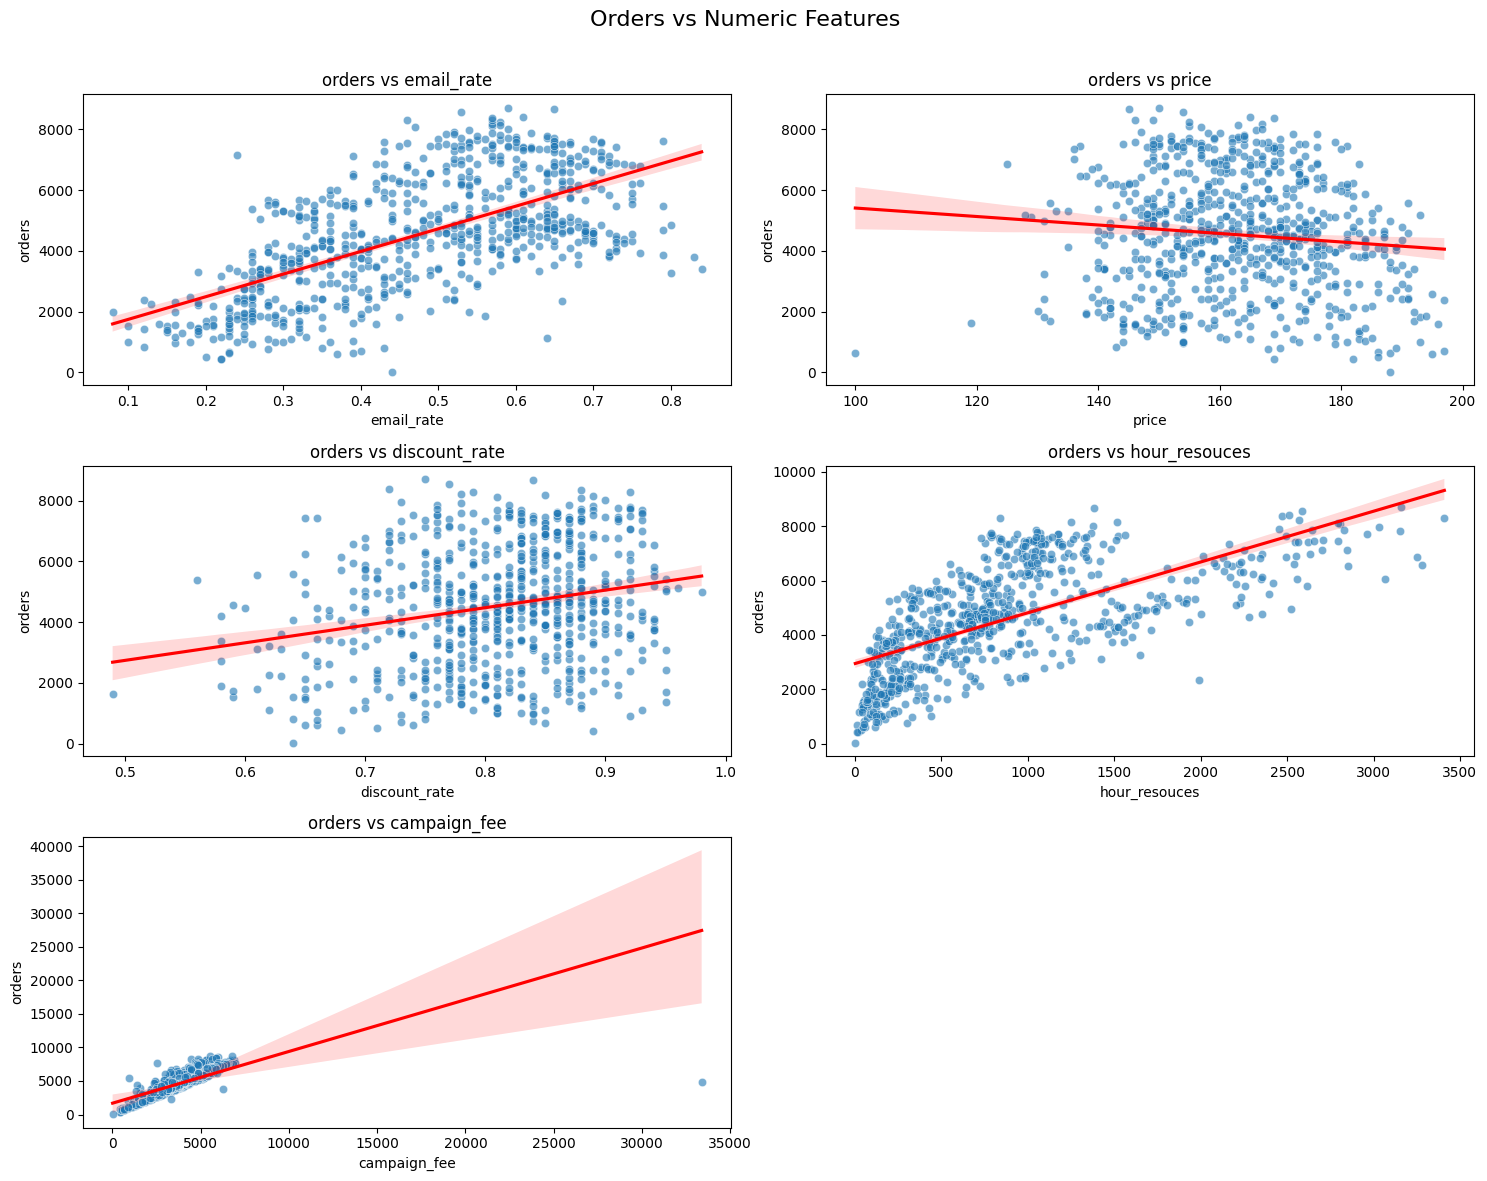

In [ ]:
plt.figure(figsize=(15, 12))

for i, col in enumerate(numeric_column, 1):
    plt.subplot(3, 2, i)
    sns.scatterplot(data=df, x=col, y='orders', alpha=0.6)
    sns.regplot(data=df, x=col, y='orders', scatter=False, color='red')
    plt.title(f'orders vs {col}', fontsize=12)
    plt.xlabel(col)
    plt.ylabel('orders')

plt.suptitle('Orders vs Numeric Features', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

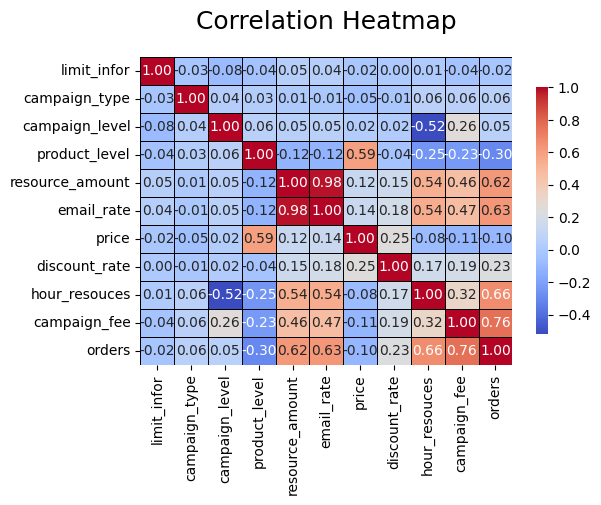

In [ ]:
co_matrix =df.corr(numeric_only=True)
plt.figure(figsize=(6, 4))
sns.heatmap(
    co_matrix,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=0.5,
    linecolor='black',
    cbar_kws={'shrink': 0.8} # Shrink color bar for better fit
)

plt.title('Correlation Heatmap', fontsize=18, pad=20)
plt.show()


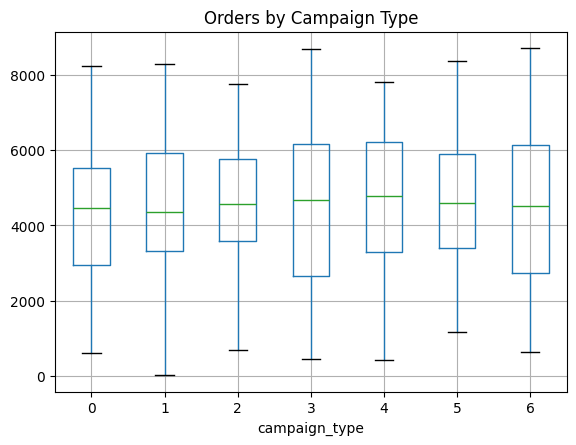

In [ ]:
df.boxplot(column='orders', by='campaign_type')
plt.title('Orders by Campaign Type')
plt.suptitle('')
plt.show()

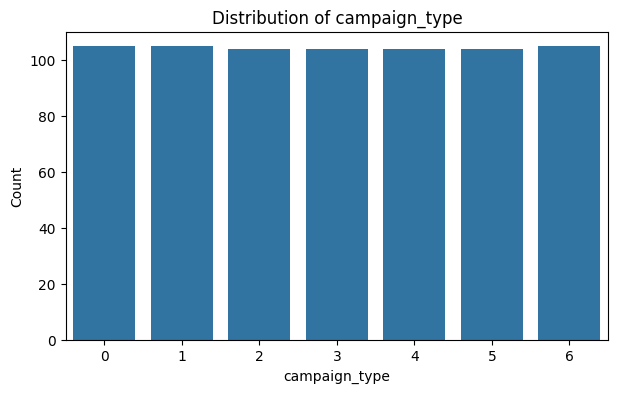

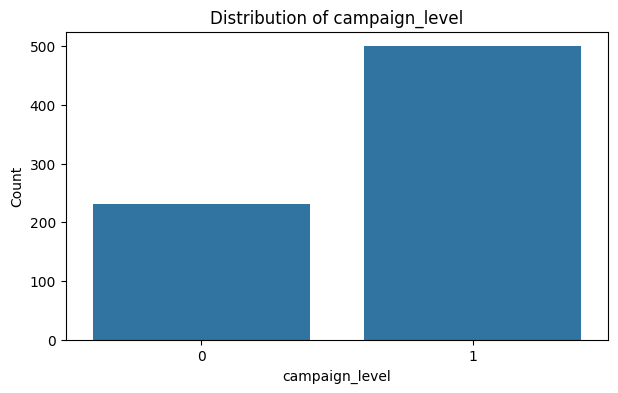

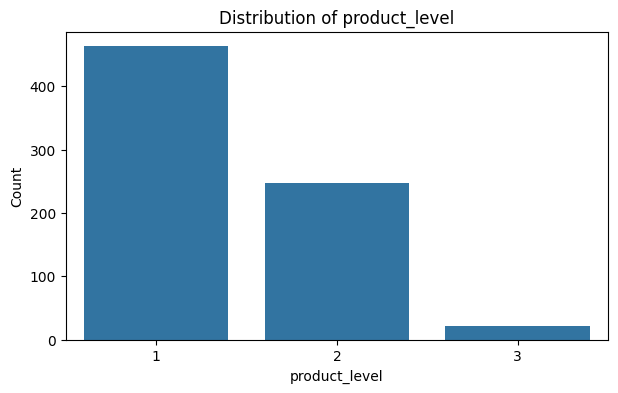

In [ ]:
for col in ['campaign_type', 'campaign_level', 'product_level']:
    plt.figure(figsize=(7,4))
    sns.countplot(x=df[col])
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

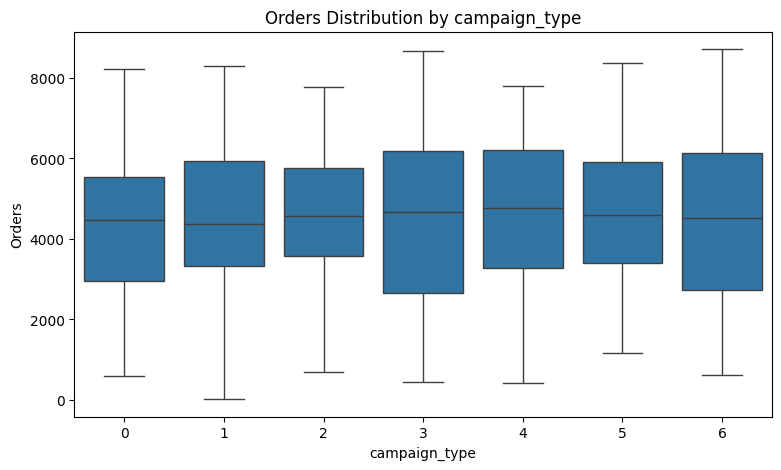

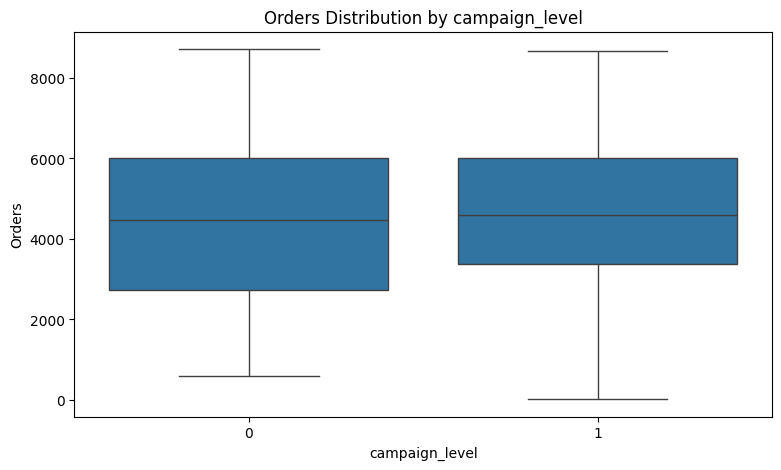

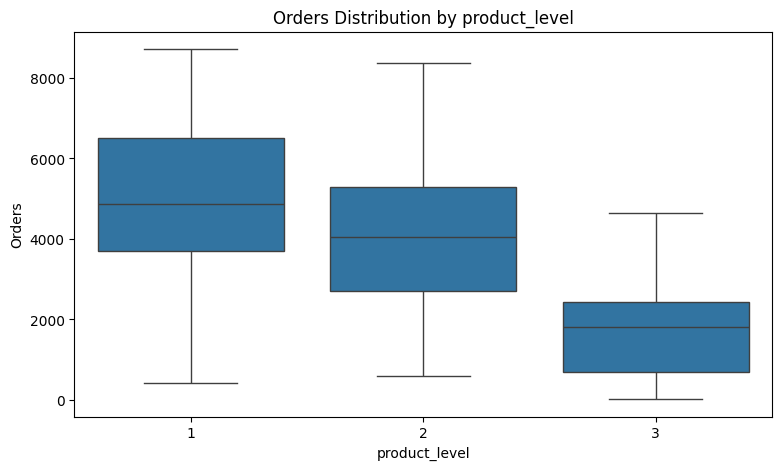

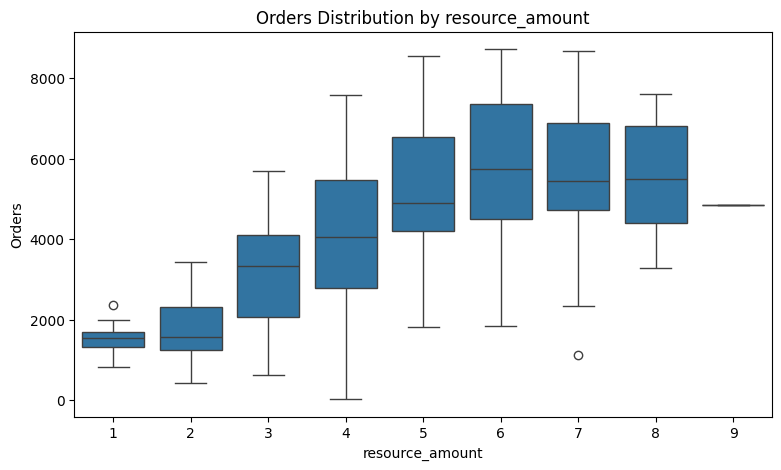

In [ ]:
for col in ['campaign_type', 'campaign_level', 'product_level','resource_amount']:
    plt.figure(figsize=(9,5))
    sns.boxplot(x=df[col], y=df['orders'])
    plt.title(f'Orders Distribution by {col}')
    plt.xlabel(col)
    plt.ylabel('Orders')
    plt.show()

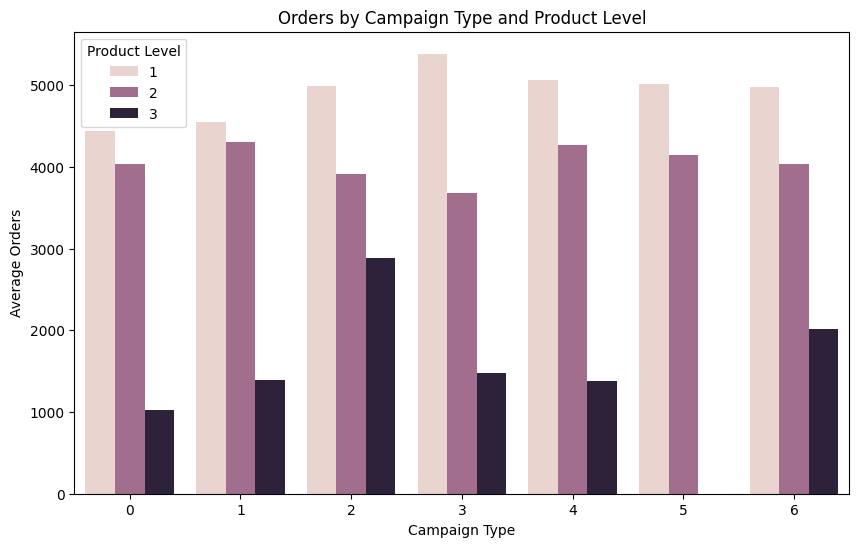

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=df,
    x='campaign_type',
    y='orders',
    hue='product_level',
    estimator='mean',
    errorbar=None
)
plt.title('Orders by Campaign Type and Product Level')
plt.xlabel('Campaign Type')
plt.ylabel('Average Orders')
plt.legend(title='Product Level')
plt.show()

From the visualization analysis, product level has a significant impact on the number of orders. Higher product levels consistently generate more orders compared to lower levels. Additionally, Campaign Type 3 shows the strongest performance, indicating that this campaign strategy is particularly effective in driving higher order volumes.

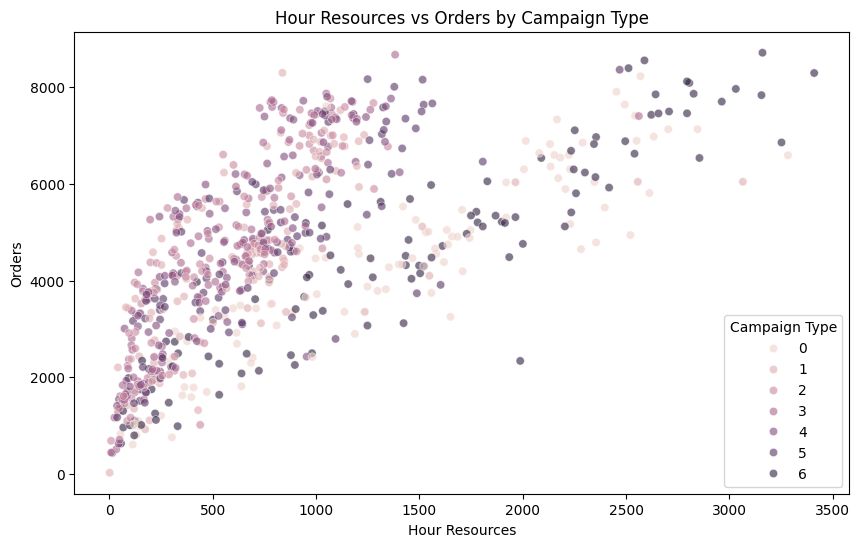

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x='hour_resouces',
    y='orders',
    hue='campaign_type',
    alpha=0.6
)
plt.title('Hour Resources vs Orders by Campaign Type')
plt.xlabel('Hour Resources')
plt.ylabel('Orders')
plt.legend(title='Campaign Type')
plt.show()


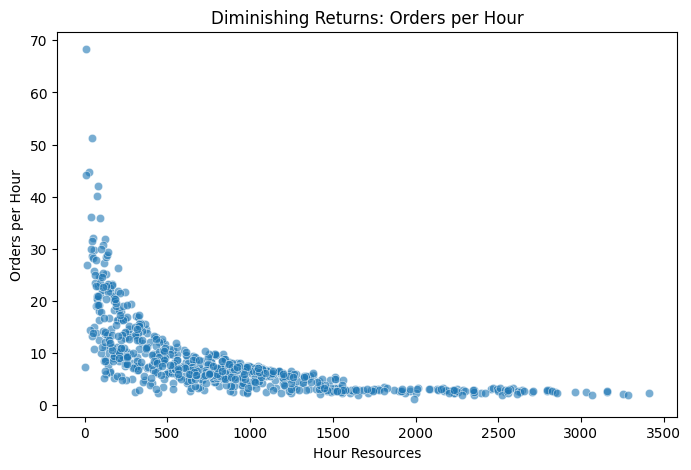

In [ ]:
df['orders_per_hour'] = df['orders'] / (df['hour_resouces'] + 1)

plt.figure(figsize=(8,5))
sns.scatterplot(
    data=df,
    x='hour_resouces',
    y='orders_per_hour',
    alpha=0.6
)
plt.title('Diminishing Returns: Orders per Hour')
plt.xlabel('Hour Resources')
plt.ylabel('Orders per Hour')
plt.show()

The derived efficiency metric, orders per hour, reveals a clear diminishing returns pattern. While initial increases in hour resources result in substantial productivity gains, the marginal benefit decreases sharply as resource allocation grows. Beyond approximately 1500–2000 hours, additional labor contributes minimal incremental value, indicating the need for optimized rather than maximal resource allocation.

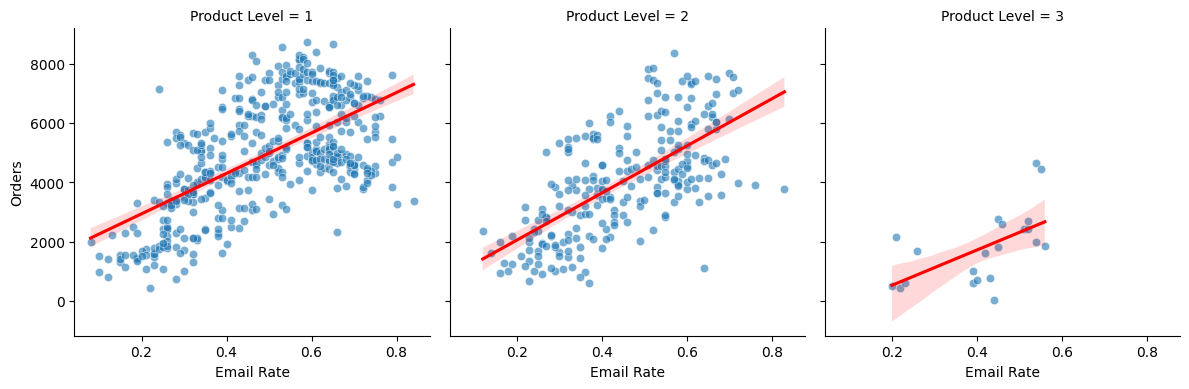

In [ ]:
g = sns.FacetGrid(
    df,
    col="product_level",
    height=4,
    aspect=1
)

g.map_dataframe(
    sns.scatterplot,
    x="email_rate",
    y="orders",
    alpha=0.6
)

g.map_dataframe(
    sns.regplot,
    x="email_rate",
    y="orders",
    scatter=False,
    color="red"
)

g.set_axis_labels("Email Rate", "Orders")
g.set_titles("Product Level = {col_name}")
plt.show()

<Axes: xlabel='price', ylabel='Count'>

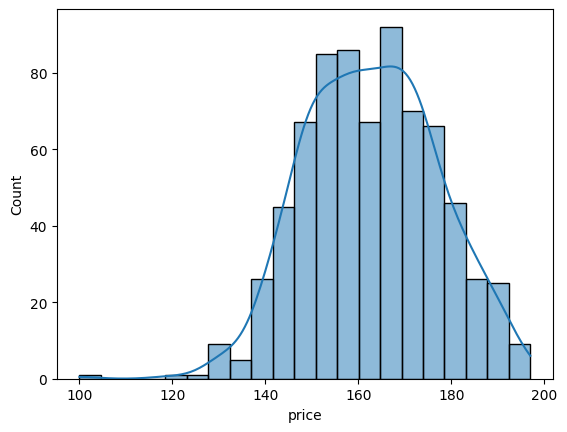

In [ ]:
sns.histplot(df['price'], kde=True)

In [ ]:
df[['price','campaign_fee','hour_resouces']].skew()

,0
price,-0.070602
campaign_fee,5.163608
hour_resouces,1.266650


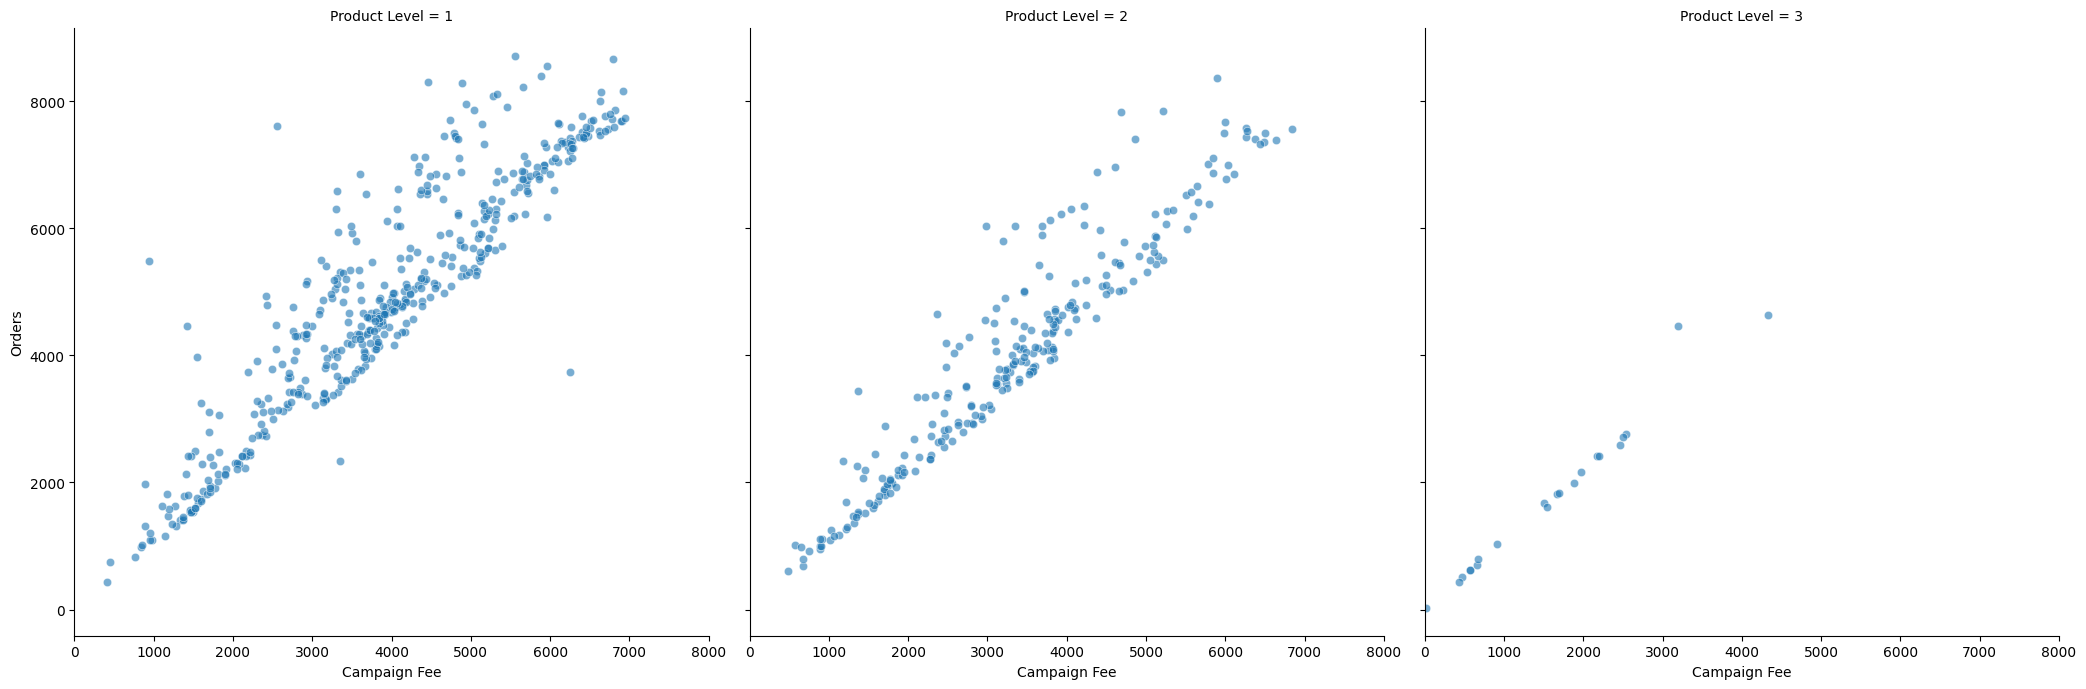

In [ ]:
g = sns.FacetGrid(
    df,
    col='product_level',
    height=7,
    aspect=1
)
g.map_dataframe(
    sns.scatterplot,
    x='campaign_fee',
    y='orders',
    alpha=0.6
)
g.set(xlim=(0, 8000))
g.set_axis_labels("Campaign Fee", "Orders")
g.set_titles("Product Level = {col_name}")
plt.show()

In [ ]:
df['resource_amount'].value_counts()

,count
resource_amount,
3,141
7,138
6,115
4,113
5,106
2,55
8,54
1,8
9,1


In [ ]:
df['price'].describe()
df[df['price'] <= 50].head()

,limit_infor,campaign_type,campaign_level,product_level,resource_amount,email_rate,price,discount_rate,hour_resouces,campaign_fee,orders,orders_per_hour


In [ ]:
# STEP 1️: DATA CLEANING(Preprocessing)

df = df[df['price'] > 50]
df = df[df['limit_infor'] != 10]
df = df[df['resource_amount'] != 9]

# STEP 2️: FEATURE–TARGET SPLIT

x=df.drop('orders',axis=1)
y=df['orders']


# STEP 3️: FEATURE TYPE IDENTIFICATION
numeric_feature=[ 'email_rate', 'price', 'discount_rate',
                  'hour_resouces', 'campaign_fee']

categorical_features=['limit_infor', 'campaign_type', 'campaign_level', 'product_level','resource_amount']



# STEP 4️: DATA PREPROCESSING PIPELINES

numeric_transformer=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median'))
    ,('scaler',StandardScaler())
])

categorical_transformer=Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
     ('onehot', OneHotEncoder(drop='first',
        handle_unknown='ignore'))
])

preprocessor=ColumnTransformer(
    transformers=[
        ('num',numeric_transformer,numeric_feature),
        ('cat',categorical_transformer,categorical_features)
    ]
)

# STEP 5️ : MODEL DEFINITIONS

models={
    'LinearRegression':LinearRegression(),
    'DecisionTreeRegressor':DecisionTreeRegressor(max_depth=5,random_state=42),
    'RandomForestRegressor':RandomForestRegressor(
                                   max_depth=10,
                                   max_features=3,
                                   n_estimators=100,
                                   random_state=42,
                                   ),
    'GradientBoosting': GradientBoostingRegressor(
    n_estimators=255,
    learning_rate=0.03,
    max_depth=2,
    subsample=0.7,
    random_state=42
),
    'XGBoost': XGBRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=4,
        subsample=0.8,
        colsample_bytree=0.8,
        objective='reg:squarederror',
        random_state=42)
}

# STEP 6️ : TRAIN–TEST SPLIT
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


# STEP 7️ : MODEL TRAINING + CROSS-VALIDATION + EVALUATION
result=[]

for name,model in models.items():
    pipeline=Pipeline(steps=[
      ('preprocessor',preprocessor),
      ('model',model)
    ])
    cv_rmse = -cross_val_score(
        pipeline, x_train, y_train,
        cv=5,
        scoring='neg_root_mean_squared_error'
    ).mean()



    pipeline.fit(x_train,y_train)
    y_pred=pipeline.predict(x_test)

    result.append({
       'Model':name,
       'CV_RMSE': round(cv_rmse, 4),
       'MSE': f"{mean_squared_error(y_test, y_pred):.2e}",
       'R2':round(r2_score(y_test,y_pred),4),
       'MAE': round(mean_absolute_error(y_test,y_pred),4),
       'RMSE':round(np.sqrt(mean_squared_error(y_test,y_pred)),4)
    })

results_df = pd.DataFrame(result).sort_values(by='R2', ascending=False)
print(results_df)


# STEP 8️ : GLOBAL CROSS-VALIDATION CHECK (R²)
cv_scores = cross_val_score(model, x, y, cv=5, scoring='r2')
print("CV R² mean:", round(cv_scores.mean(),4))


# STEP 9️ : HYPERPARAMETER TUNING – GRADIENT BOOSTING
param_grid_gb = {
    'model__n_estimators': [150, 250, 350],
    'model__learning_rate': [0.03, 0.05, 0.1],
    'model__max_depth': [2, 3, 4],
    'model__subsample': [0.8, 1.0]
}

gb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', GradientBoostingRegressor(random_state=42))
])

grid_gb = GridSearchCV(
    gb_pipeline,
    param_grid=param_grid_gb,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

grid_gb.fit(x_train, y_train)
best_gb = grid_gb.best_estimator_

y_pred_gb = best_gb.predict(x_test)

print("\nTUNED GRADIENT BOOSTING RESULTS")
print("Best Params:", grid_gb.best_params_)
print("CV RMSE:", round(-grid_gb.best_score_, 4))
print("Test RMSE:", round(np.sqrt(mean_squared_error(y_test, y_pred_gb)), 4))
print("Test MAE:", round(mean_absolute_error(y_test, y_pred_gb), 4))
print("Test R2:", round(r2_score(y_test, y_pred_gb), 4))



# STEP 10: HYPERPARAMETER TUNING – XGBOOST
param_grid_xgb = {
    'model__n_estimators': [200, 300],
    'model__learning_rate': [0.03, 0.05],
    'model__max_depth': [3, 4],
    'model__subsample': [0.8, 1.0],
    'model__colsample_bytree': [0.8, 1.0]
}

xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(
        objective='reg:squarederror',
        random_state=42
    ))
])

grid_xgb = GridSearchCV(
    estimator=xgb_pipeline,
    param_grid=param_grid_xgb,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

grid_xgb.fit(x_train, y_train)
y_pred_xgb = grid_xgb.predict(x_test)

print("\nTUNED XGBOOST RESULTS")

print("Best XGBoost Params:")
print(grid_xgb.best_params_)

print("Best CV RMSE:",
      round(grid_xgb.best_score_, 4))
print('Tuned GradientBoosting'),
print('CV_RMSE:', round(grid_xgb.best_score_, 4))
print('MSE:', f"{mean_squared_error(y_test, y_pred_xgb):.2e}")
print('R2:', round(r2_score(y_test, y_pred_xgb), 4))
print('MAE:', round(mean_absolute_error(y_test, y_pred_xgb), 4))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test, y_pred_xgb)), 4))

                   Model    CV_RMSE       MSE      R2       MAE      RMSE
3       GradientBoosting   419.2879  1.32e+05  0.9654  154.9504  362.9315
4                XGBoost   467.3651  1.41e+05  0.9629  158.4312  375.8695
1  DecisionTreeRegressor   598.5463  2.06e+05  0.9461  293.8052  453.3925
2  RandomForestRegressor   654.3170  3.92e+05  0.8972  451.8584  625.9352
0       LinearRegression  1132.4311  5.28e+05  0.8614  554.5084  726.6979
CV R² mean: 0.9078

TUNED GRADIENT BOOSTING RESULTS
Best Params: {'model__learning_rate': 0.03, 'model__max_depth': 2, 'model__n_estimators': 250, 'model__subsample': 0.8}
CV RMSE: 416.278
Test RMSE: 363.0094
Test MAE: 164.2151
Test R2: 0.9654

TUNED XGBOOST RESULTS
Best XGBoost Params:
{'model__colsample_bytree': 1.0, 'model__learning_rate': 0.03, 'model__max_depth': 3, 'model__n_estimators': 200, 'model__subsample': 0.8}
Best CV RMSE: -423.5036
Tuned GradientBoosting
CV_RMSE: -423.5036
MSE: 1.35e+05
R2: 0.9645
MAE: 147.0452
RMSE: 367.7803


In [7]:
# STEP 1️: DATA CLEANING(Preprocessing)
df = df[df['price'] > 50]
df = df[df['limit_infor'] != 10]
df = df[df['resource_amount'] != 9]

# STEP 2️: FEATURE–TARGET SPLIT

x=df.drop('orders',axis=1)
y=df['orders']


# STEP 3️: FEATURE TYPE IDENTIFICATION

numeric_feature=[ 'email_rate', 'price', 'discount_rate',
                  'hour_resouces', 'campaign_fee']

categorical_features=['limit_infor', 'campaign_type', 'campaign_level', 'product_level','resource_amount']


# STEP 4️: DATA PREPROCESSING PIPELINES
numeric_transformer=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median'))
    ,('scaler',StandardScaler())
])

categorical_transformer=Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
     ('onehot', OneHotEncoder(drop='first',
        handle_unknown='ignore'))
])

preprocessor=ColumnTransformer(
    transformers=[
        ('num',numeric_transformer,numeric_feature),
        ('cat',categorical_transformer,categorical_features)
    ]
)


# STEP 5️ : MODEL DEFINITIONS
model=GradientBoostingRegressor(
    n_estimators=255,
    learning_rate=0.03,
    max_depth=2,
    subsample=0.7,
    random_state=42)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', GradientBoostingRegressor(
        n_estimators=255,
        learning_rate=0.03,
        max_depth=2,
        subsample=0.7,
        random_state=42
    ))
])

# STEP 6️ : TRAIN–TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

# STEP 7️ : MODEL TRAINING + CROSS-VALIDATION + EVALUATION
cv_rmse = -cross_val_score(
        pipeline, x_train, y_train,
        cv=5,
        scoring='neg_root_mean_squared_error'
    ).mean()

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('CV_RMSE:', round(cv_rmse, 4))
print('MSE:', f"{mean_squared_error(y_test, y_pred_xgb):.2e}")
print("RMSE:", round(rmse, 2))
print("MAE:", round(mae, 2))
print("R2:", round(r2, 4))

# STEP 8️ : GLOBAL CROSS-VALIDATION CHECK (R²)
cv_scores = cross_val_score(model, x, y, cv=5, scoring='r2')
print("CV R² mean:", round(cv_scores.mean(),4))


CV_RMSE: 419.2879
MSE: 1.35e+05
RMSE: 362.93
MAE: 154.95
R2: 0.9654
CV R² mean: 0.9153


In [ ]:
import joblib
joblib.dump(pipeline, "campaign_model.pkl")

['campaign_model.pkl']